In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
content = requests.get(url).content
data = pd.read_csv(io.StringIO(content.decode('utf-8')))
indiaData = data[data.location=='India']

In [6]:

indiaData.date = pd.to_datetime(indiaData.date, format='%Y-%m-%d')
indiaData.sort_values(by='date', ascending=False).head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
19687,IND,Asia,India,2020-09-27,5992532.0,88600.0,84559.000,94503.0,1124.0,1107.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19686,IND,Asia,India,2020-09-26,5903932.0,85362.0,85131.143,93379.0,1089.0,1108.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19685,IND,Asia,India,2020-09-25,5818570.0,86052.0,86270.429,92290.0,1141.0,1131.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19684,IND,Asia,India,2020-09-24,5732518.0,86508.0,87752.143,91149.0,1129.0,1135.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19683,IND,Asia,India,2020-09-23,5646010.0,83347.0,89378.714,90020.0,1085.0,1136.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


Text(0.5, 1.0, 'Covid-2019 Status for India')

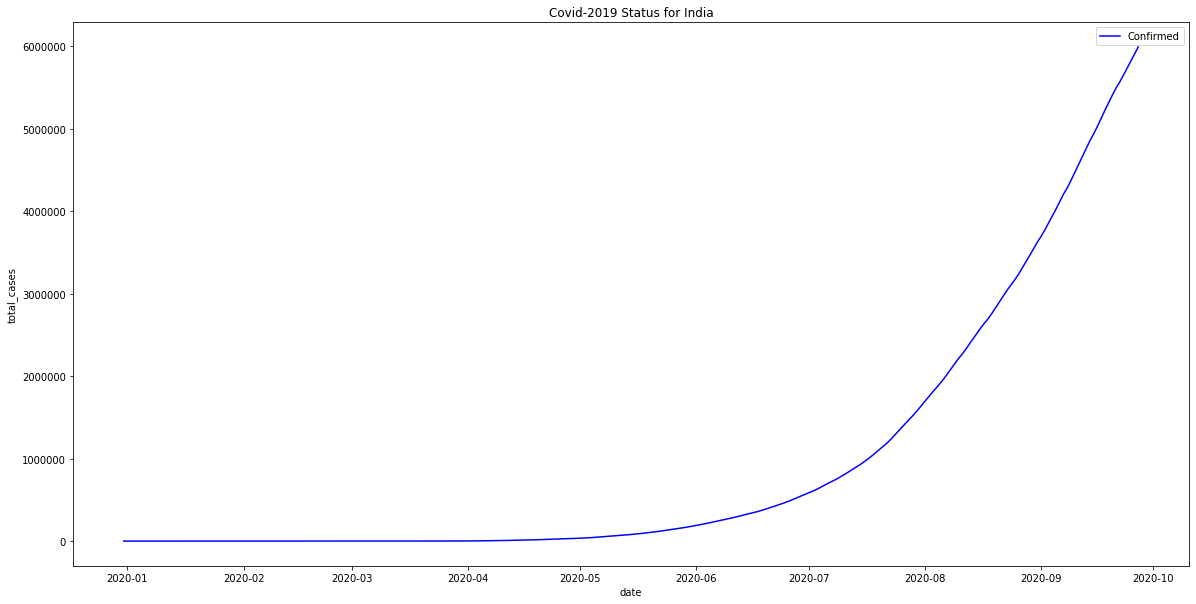

In [7]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='total_cases', data=indiaData, label='Confirmed', color='blue')
plt.title('Covid-2019 Status for India')

Text(0.5, 1.0, 'Covid-2019 New Cases per day for India')

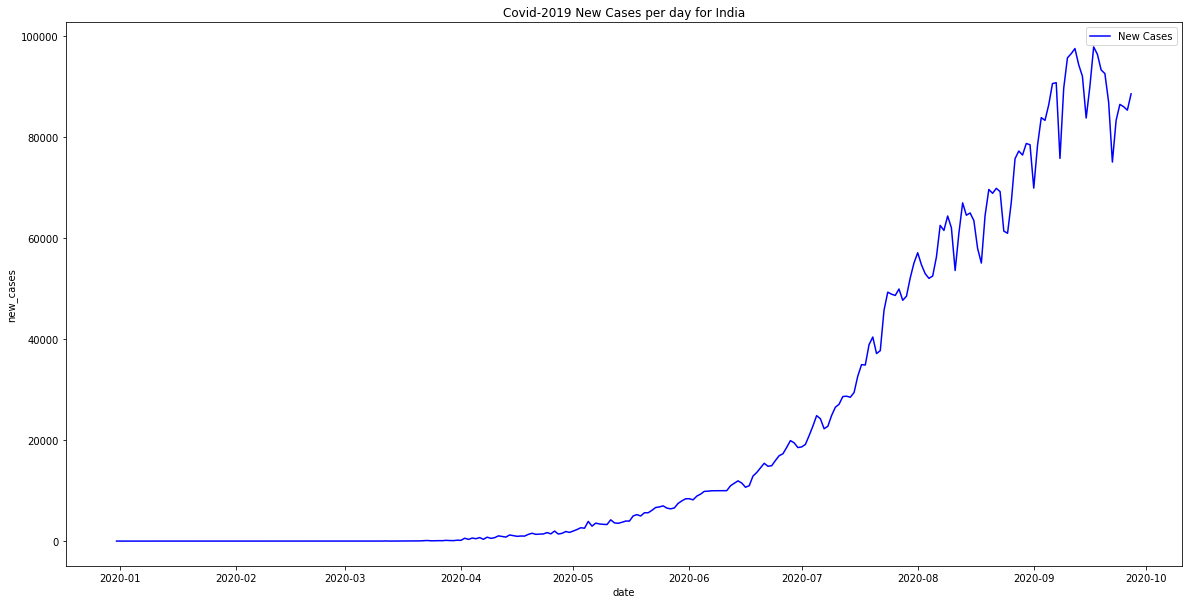

In [8]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='new_cases', data=indiaData, label='New Cases', color='blue')
plt.title('Covid-2019 New Cases per day for India')

In [9]:
dataForProphet = indiaData[['date','total_cases']].rename(columns={'date':'ds','total_cases':'y'}).sort_values(by='y', ascending=False).dropna()
# dataForProphet['cap'] = 1353000000 # population of India as of 2018
dataForProphet.head()

,ds,y
19687,2020-09-27,5992532.0
19686,2020-09-26,5903932.0
19685,2020-09-25,5818570.0
19684,2020-09-24,5732518.0
19683,2020-09-23,5646010.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


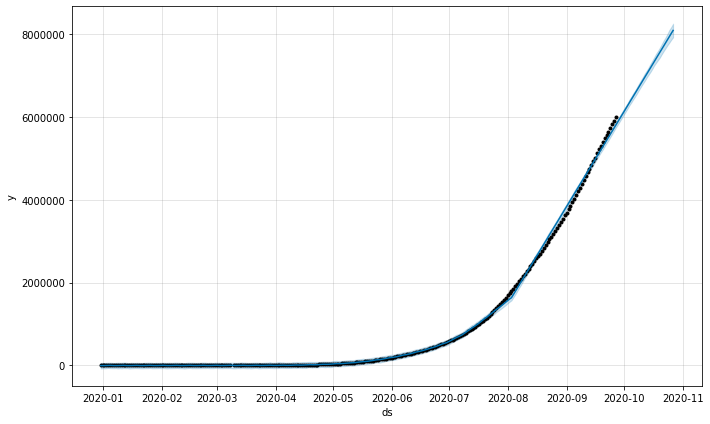

In [10]:
# Ideally Logistic growth should be used but it still looks like the inflection point has not been achieved yet
# Hence using linear growth which is default
m = Prophet()
m.fit(dataForProphet)
future = m.make_future_dataframe(periods=30)
# future['cap'] = 135300000
forecast = m.predict(future)
fig = m.plot(forecast)

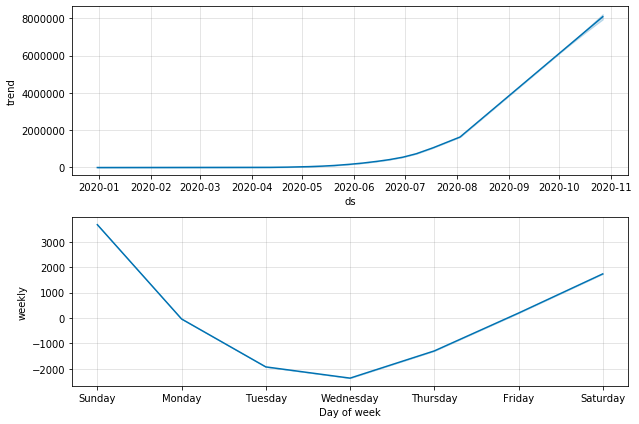

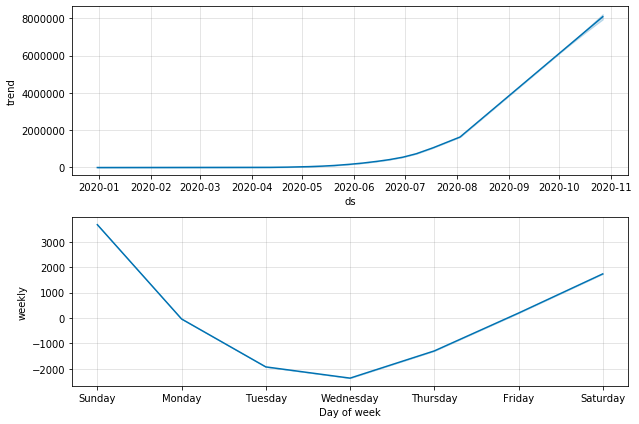

In [11]:
m.plot_components(forecast)

In [12]:
# Suppress scientific display
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

            ds          yhat    yhat_lower    yhat_upper
271 2020-09-28 5888138.59124 5818890.49331 5955270.99560
272 2020-09-29 5962194.67046 5897383.07127 6029138.64774
273 2020-09-30 6037694.48745 5970694.68194 6107511.84125
274 2020-10-01 6114706.25559 6047408.59625 6186339.36491
275 2020-10-02 6192136.91807 6122833.29231 6256416.23719
276 2020-10-03 6269620.81620 6198195.86609 6330336.48810
277 2020-10-04 6347498.13571 6279297.86869 6419300.94010
278 2020-10-05 6419729.07889 6347559.62393 6489556.21276
279 2020-10-06 6493785.15811 6423306.53791 6570399.60404
280 2020-10-07 6569284.97510 6491960.40544 6638927.64907
281 2020-10-08 6646296.74324 6566641.16226 6720133.46009
282 2020-10-09 6723727.40573 6646630.57588 6803236.46067
283 2020-10-10 6801211.30386 6722523.26634 6881513.96092
284 2020-10-11 6879088.62336 6795225.81740 6957566.98831
285 2020-10-12 6951319.56655 6865038.38305 7042134.92760
286 2020-10-13 7025375.64577 6942440.85270 7110662.05925
287 2020-10-14 7100875.46275 70